# Regression with a Tabular Media Campaign Cost Dataset

## Proje [linki](https://www.kaggle.com/competitions/playground-series-s3e11/code)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e11/sample_submission.csv
/kaggle/input/playground-series-s3e11/train.csv
/kaggle/input/playground-series-s3e11/test.csv


In [38]:
pd.read_csv("/kaggle/input/playground-series-s3e11/sample_submission.csv")

,id,cost
0,360336,99.615
1,360337,99.615
2,360338,99.615
3,360339,99.615
4,360340,99.615
...,...,...
240219,600555,99.615
240220,600556,99.615
240221,600557,99.615
240222,600558,99.615


In [39]:
df1 = pd.read_csv("/kaggle/input/playground-series-s3e11/train.csv")
df2 = pd.read_csv("/kaggle/input/playground-series-s3e11/test.csv")

In [40]:
df1

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


In [41]:
df2

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [42]:
df1.corr()["cost"][df1.corr()["cost"]>-0.2].sort_values(ascending=False)

cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64

store_sales(in millions)


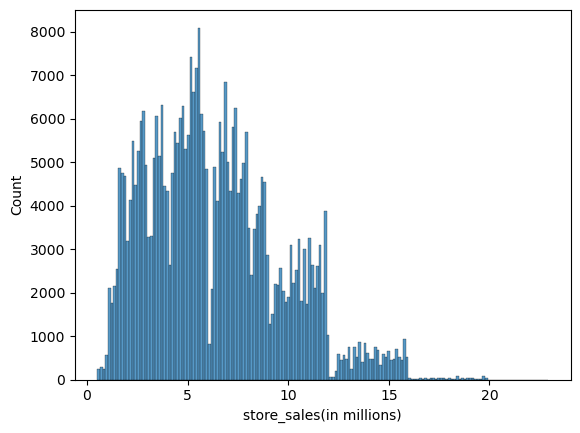

5.04     2373
5.40     1988
7.41     1919
7.95     1874
5.52     1831
         ... 
3.79        1
5.45        1
16.15       1
2.02        1
5.77        1
Name: store_sales(in millions), Length: 1044, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
unit_sales(in millions)


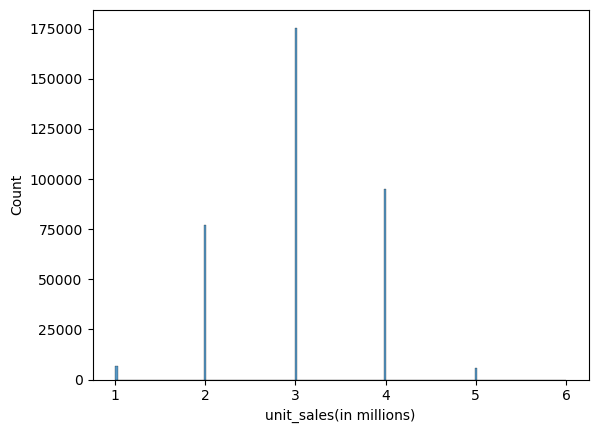

3.0    175556
4.0     94999
2.0     77240
1.0      6765
5.0      5745
6.0        31
Name: unit_sales(in millions), dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
total_children


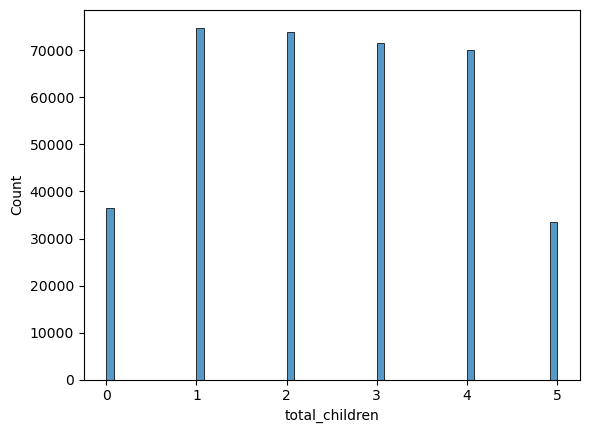

1.0    74857
2.0    73902
3.0    71524
4.0    70134
0.0    36441
5.0    33478
Name: total_children, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
num_children_at_home


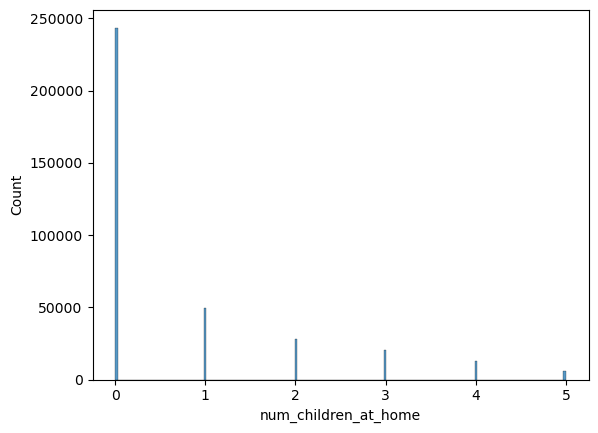

0.0    243555
1.0     49427
2.0     28163
3.0     20382
4.0     12532
5.0      6277
Name: num_children_at_home, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
avg_cars_at home(approx).1


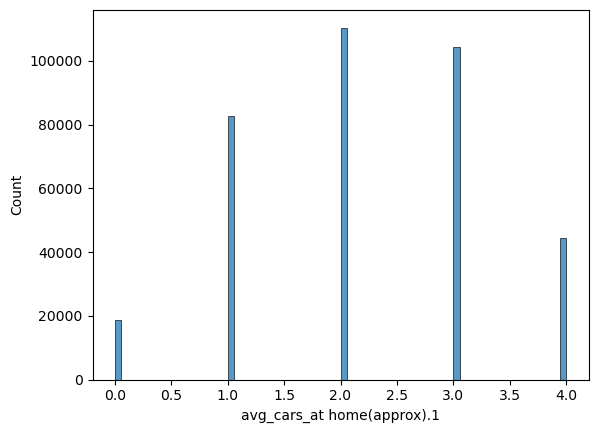

2.0    110401
3.0    104424
1.0     82619
4.0     44355
0.0     18537
Name: avg_cars_at home(approx).1, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
gross_weight


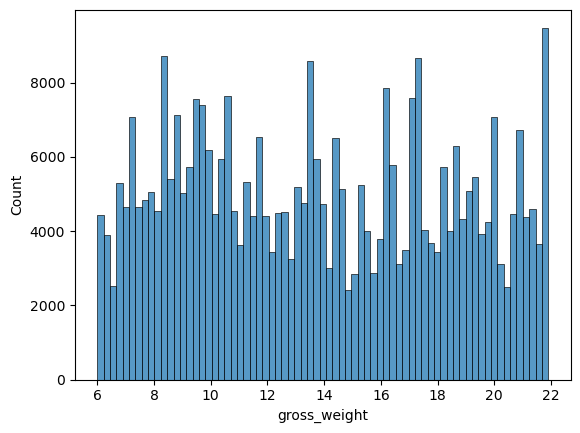

17.10    4372
14.70    3906
19.90    3800
17.20    3616
13.70    3516
         ... 
12.01       1
10.98       1
10.01       1
9.08        1
9.60        1
Name: gross_weight, Length: 384, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
recyclable_package


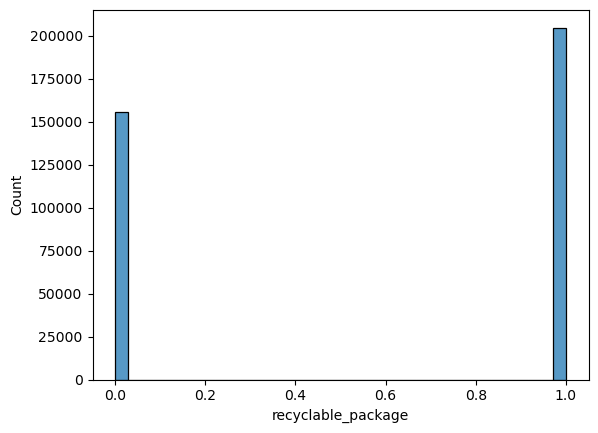

1.0    204702
0.0    155634
Name: recyclable_package, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
low_fat


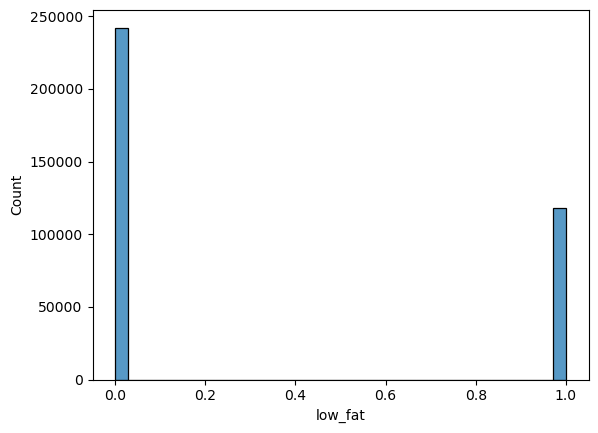

0.0    242219
1.0    118117
Name: low_fat, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
units_per_case


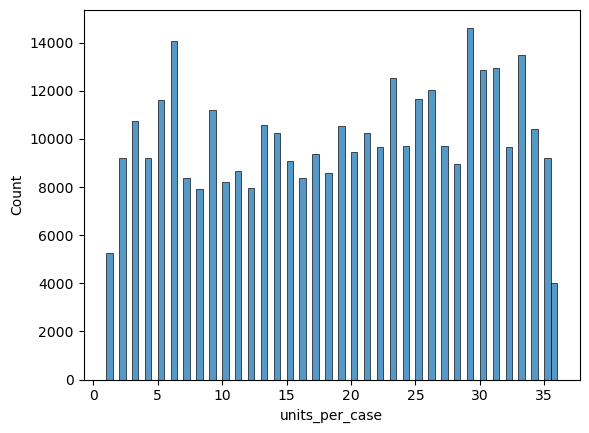

29.0    14626
6.0     14064
33.0    13483
31.0    12947
30.0    12847
23.0    12517
26.0    12050
25.0    11651
5.0     11624
9.0     11219
3.0     10736
13.0    10577
19.0    10525
34.0    10401
21.0    10242
14.0    10234
24.0     9698
27.0     9697
22.0     9677
32.0     9668
20.0     9471
17.0     9390
35.0     9203
2.0      9195
4.0      9194
15.0     9100
28.0     8960
11.0     8648
18.0     8575
16.0     8378
7.0      8367
10.0     8217
12.0     7949
8.0      7928
1.0      5273
36.0     4005
Name: units_per_case, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
store_sqft


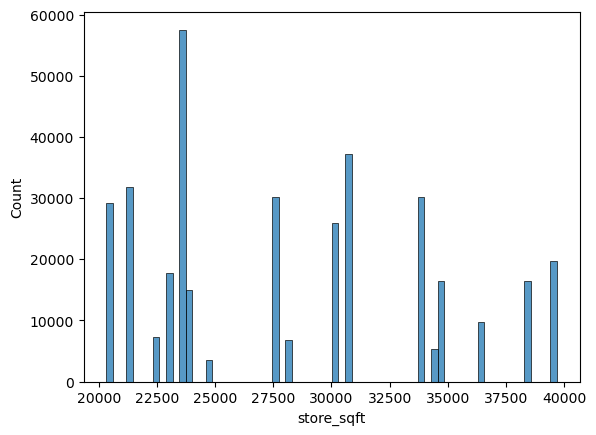

21215.0    31807
27694.0    30280
33858.0    30218
23598.0    29659
20319.0    29193
30268.0    25995
30797.0    24271
39696.0    19690
23112.0    17765
34791.0    16498
38382.0    16454
23688.0    16072
23759.0    14934
30584.0    13016
23593.0    11877
36509.0     9701
22478.0     7314
28206.0     6787
34452.0     5319
24597.0     3486
Name: store_sqft, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
coffee_bar


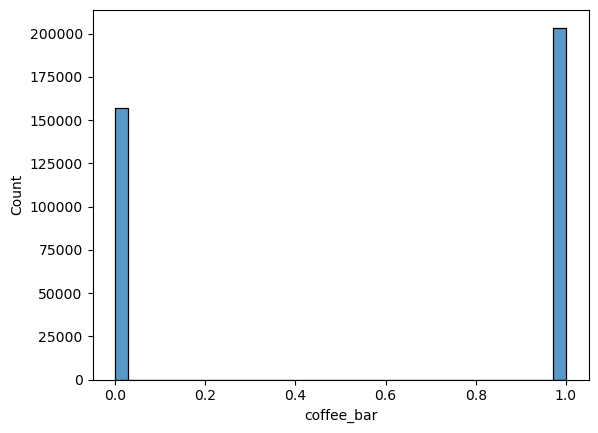

1.0    203532
0.0    156804
Name: coffee_bar, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
video_store


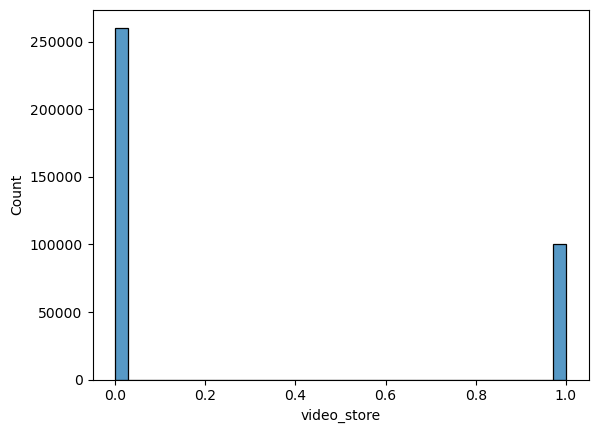

0.0    260381
1.0     99955
Name: video_store, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
salad_bar


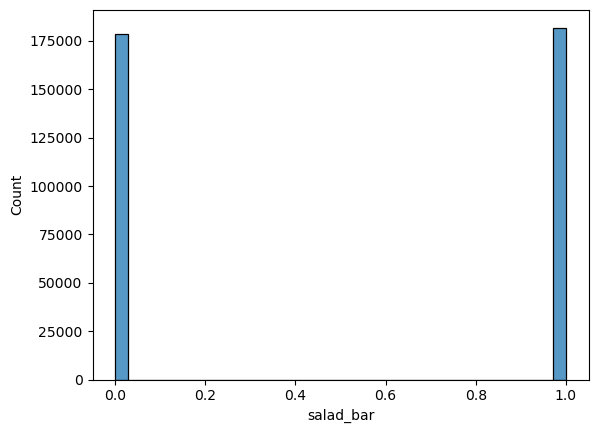

1.0    181900
0.0    178436
Name: salad_bar, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
prepared_food


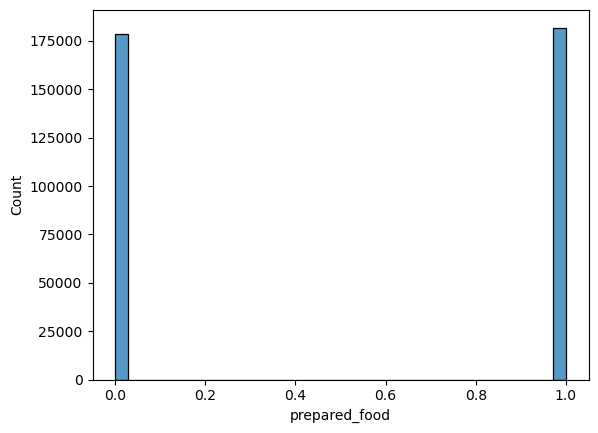

1.0    181909
0.0    178427
Name: prepared_food, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
florist


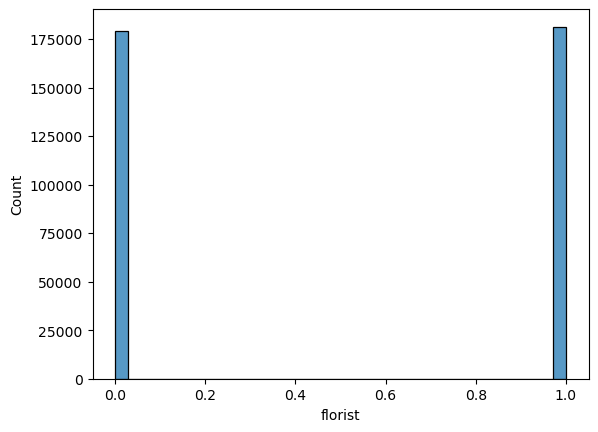

1.0    181318
0.0    179018
Name: florist, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(1,len(df1.columns)-1):
    print(df1.columns[i])
    aziz = df1[df1.columns[i]].value_counts()
    sns.histplot(df1[df1.columns[i]])
    plt.show()
    print(aziz)
    print("-"*85)
    print("-"*85)

In [45]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
  Using cached importlib_metadata-6.3.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 16.0 MB/s eta 0:00:00
   

In [46]:
from pycaret.utils import version
version()

'3.0.0'

In [50]:
from pycaret.regression import *
df1_new = setup(df1, target = 'cost', session_id=123, experiment_name='Tubular_media_campaign')

,Description,Value
0,Session id,123
1,Target,cost
2,Target type,Regression
3,Original data shape,"(360336, 17)"
4,Transformed data shape,"(360336, 17)"
5,Transformed train set shape,"(252235, 17)"
6,Transformed test set shape,"(108101, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [51]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.2531,805.2607,28.3770,0.1029,0.3034,0.2801,29.7040
lightgbm,Light Gradient Boosting Machine,24.3687,806.8756,28.4055,0.1011,0.3040,0.2816,4.0650
xgboost,Extreme Gradient Boosting,24.3196,810.1486,28.4630,0.0975,0.3042,0.2808,15.1930
rf,Random Forest Regressor,24.2277,830.1838,28.8128,0.0751,0.3070,0.2792,70.0170
gbr,Gradient Boosting Regressor,24.9714,836.7831,28.9272,0.0678,0.3092,0.2887,18.7420
ada,AdaBoost Regressor,25.4915,861.9427,29.3588,0.0398,0.3134,0.2945,3.0090
et,Extra Trees Regressor,24.4420,877.2167,29.6177,0.0227,0.3143,0.2809,44.2910
lr,Linear Regression,25.6041,880.3832,29.6712,0.0192,0.3173,0.2973,0.6300
ridge,Ridge Regression,25.6041,880.3813,29.6711,0.0192,0.3173,0.2973,0.1880
br,Bayesian Ridge,25.6041,880.3821,29.6712,0.0192,0.3173,0.2973,0.2090


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

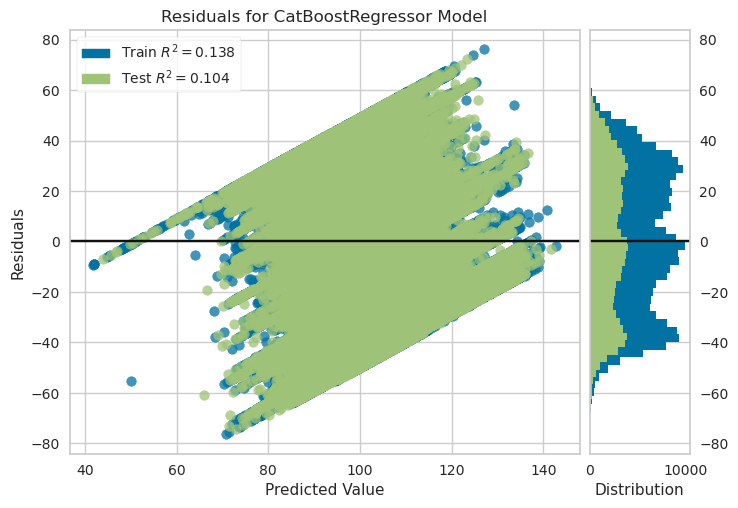

In [52]:
# plot residuals
plot_model(best, plot = 'residuals')

In [53]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,24.1531,800.3551,28.2905,0.1040,0.3017,0.2778


In [55]:
holdout_pred.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,prediction_label
70461,70461,11.84,4.0,3.0,1.0,2.0,14.60,1.0,1.0,36.0,23598.0,0.0,0.0,0.0,0.0,1.0,147.350006,99.241346
63987,63987,5.46,3.0,3.0,3.0,2.0,21.10,1.0,0.0,20.0,20319.0,0.0,0.0,0.0,0.0,0.0,139.190002,116.531997
167061,167061,15.80,4.0,3.0,1.0,2.0,8.94,1.0,0.0,17.0,30584.0,1.0,1.0,1.0,1.0,1.0,105.279999,102.540295
291068,291068,3.75,3.0,4.0,0.0,1.0,6.98,1.0,0.0,35.0,20319.0,0.0,0.0,0.0,0.0,0.0,108.220001,106.876271
76823,76823,4.28,2.0,3.0,0.0,3.0,14.50,1.0,1.0,35.0,27694.0,1.0,1.0,1.0,1.0,1.0,66.269997,79.511055


In [56]:
# predict model on new_data
predictions = predict_model(best, data = df2)
predictions.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,prediction_label
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0,98.327296
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0,98.218996
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0,97.919919
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0,110.774332
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0,82.760871


In [68]:
pred = predictions[["id", "prediction_label"]]
pred.columns = ["id", "cost"]
pred.head()

,id,cost
0,360336,98.327296
1,360337,98.218996
2,360338,97.919919
3,360339,110.774332
4,360340,82.760871


In [71]:
pred.to_csv("my_prediction.csv", index = False)

In [59]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['id', 'store_sales(in millions)',
                                              'unit_sales(in millions)',
                                              'total_children',
                                              'num_children_at_home',
                                              'avg_cars_at home(approx).1',
                                              'gross_weight',
                                              'recyclable_package', 'low_fat',
                                              'units_per_case', 'store_sqft',
                                              'coffee_bar', 'video_store',
                                              'salad_bar', 'prepared_food',
                                              'florist'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
          

In [60]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['id', 'store_sales(in millions)',
                                             'unit_sales(in millions)',
                                             'total_children',
                                             'num_children_at_home',
                                             'avg_cars_at home(approx).1',
                                             'gross_weight',
                                             'recyclable_package', 'low_fat',
                                             'units_per_case', 'store_sqft',
                                             'coffee_bar', 'video_store',
                                             'salad_bar', 'prepared_food',
                                             'florist'],
                                    transformer=SimpleImputer())),
           

In [61]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

TransformerWrapper(include=['id', 'store_sales(in millions)',
                            'unit_sales(in millions)', 'total_children',
                            'num_children_at_home',
                            'avg_cars_at home(approx).1', 'gross_weight',
                            'recyclable_package', 'low_fat', 'units_per_case',
                            'store_sqft', 'coffee_bar', 'video_store',
                            'salad_bar', 'prepared_food', 'florist'],
                   transformer=SimpleImputer())